<a href="https://colab.research.google.com/github/anas1IA/2024_new_package/blob/main/PSO_optimizaton_agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

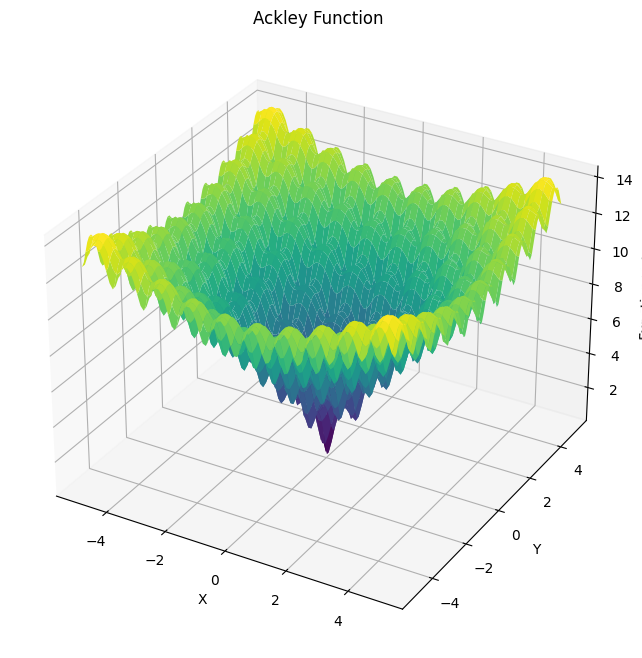

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def ackley_func(x, y):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - \
           np.exp(0.5 * (np.cos(2*np.pi * x) + np.cos(2*np.pi * y))) + np.e + 20

def plot_ackley():
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)


    Z = ackley_func(X, Y)


    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')


    ax.set_title('Ackley Function')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Function Value')


    plt.show()


plot_ackley()


In [75]:
import numpy as np
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, dim):
        self.position = np.random.uniform(-5, 5, dim)
        self.velocity = np.random.uniform(-1, 1, dim)
        self.best_position = self.position.copy()
        self.fitness = float('inf')
    def __str__(self):
        return f"Position: {self.position}, Velocity: {self.velocity}, Best Position: {self.best_position}, Fitness: {self.fitness}"

def objective_function(x):

    return np.sum(x**2)

def ackley_func(x: float, y: float):
    return -20 * np.exp(-0.2 * np.sqrt( 0.5 * (x**2 + y**2))) + \
            - np.exp(0.5 * (np.cos(2*np.pi * x) + np.cos(2*np.pi * y))) + np.e + 20


def PSO(ackley_func, dim, n_particles, n_iterations):

    w = 0.5
    c1 = 1
    c2 = 2

    particles = [Particle(dim) for _ in range(n_particles)]

    global_best_position = np.zeros(dim)
    global_best_fitness = float('inf')


    particle_positions = np.zeros((n_iterations, n_particles, dim))
    function_values = np.zeros((n_iterations, n_particles))


    for iter_idx in range(n_iterations):
        for particle_idx, particle in enumerate(particles):

            particle.fitness = ackley_func(particle.position)


            if particle.fitness < ackley_func(particle.best_position):
                particle.best_position = particle.position.copy()


            if particle.fitness < global_best_fitness:
                global_best_position = particle.position.copy()
                global_best_fitness = particle.fitness


        for particle_idx, particle in enumerate(particles):

            new_velocity = (w * particle.velocity +
                            c1 * np.random.rand(dim) * (particle.best_position - particle.position) +
                            c2 * np.random.rand(dim) * (global_best_position - particle.position))
            particle.velocity = new_velocity


            particle.position += particle.velocity


            particle_positions[iter_idx, particle_idx, :] = particle.position
            function_values[iter_idx, particle_idx] = particle.fitness

    return global_best_position, global_best_fitness, particle_positions, function_values ,particles

In [85]:
np.random.seed(42)
dim = 2
n_particles = 25
n_iterations = 40
best_position, best_fitness, particle_positions, function_values, particles = PSO(objective_function, dim, n_particles, n_iterations)
print("Best position:", best_position)
print("Best fitness:", best_fitness)
print(particles[8])

Best position: [2.28513089e-06 2.38659101e-06]
Best fitness: 1.091763980069865e-11
Position: [ 0.00037925 -0.00035109], Velocity: [-1.91589924e-05  1.36097355e-03], Best Position: [ 0.00039841 -0.00171207], Fitness: 3.0898979451985275e-06


In [72]:
def plot_pso(particle_positions, function_values):
    n_iterations, n_particles, dim = particle_positions.shape
    iterations = np.arange(n_iterations)


    plt.figure(figsize=(12, 6))
    for particle_idx in range(n_particles):
        plt.plot(iterations, particle_positions[:, particle_idx, 0], label=f'Particle {particle_idx+1}')
    plt.title('Particle Positions')
    plt.xlabel('Iteration')
    plt.ylabel('Position')
    plt.legend()
    plt.grid(True)
    plt.show()


    plt.figure(figsize=(12, 6))
    for particle_idx in range(n_particles):
        plt.plot(iterations, function_values[:, particle_idx], label=f'Particle {particle_idx+1}')
    plt.title('Function Values')
    plt.xlabel('Iteration')
    plt.ylabel('Function Value')
    plt.legend()
    plt.grid(True)
    plt.show()

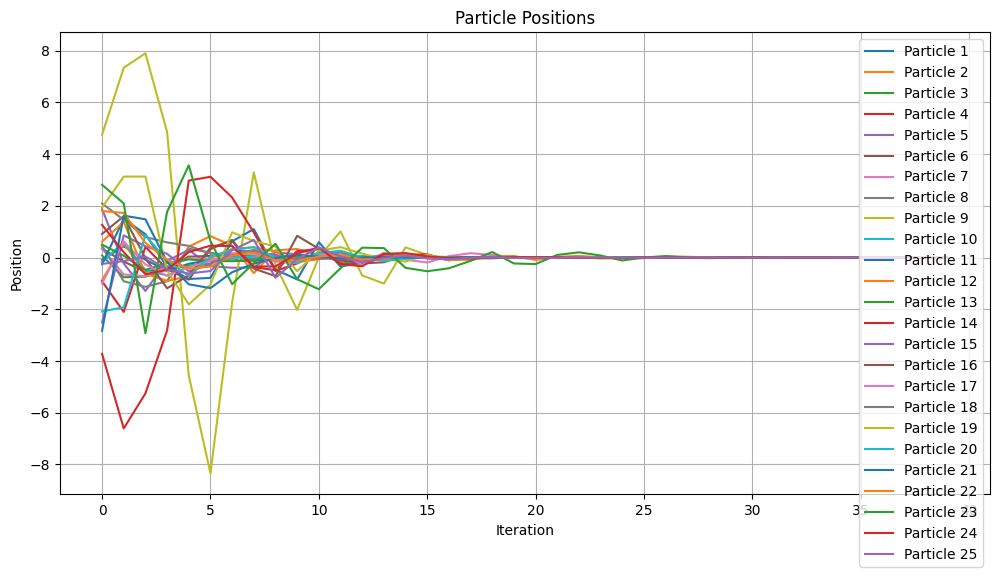

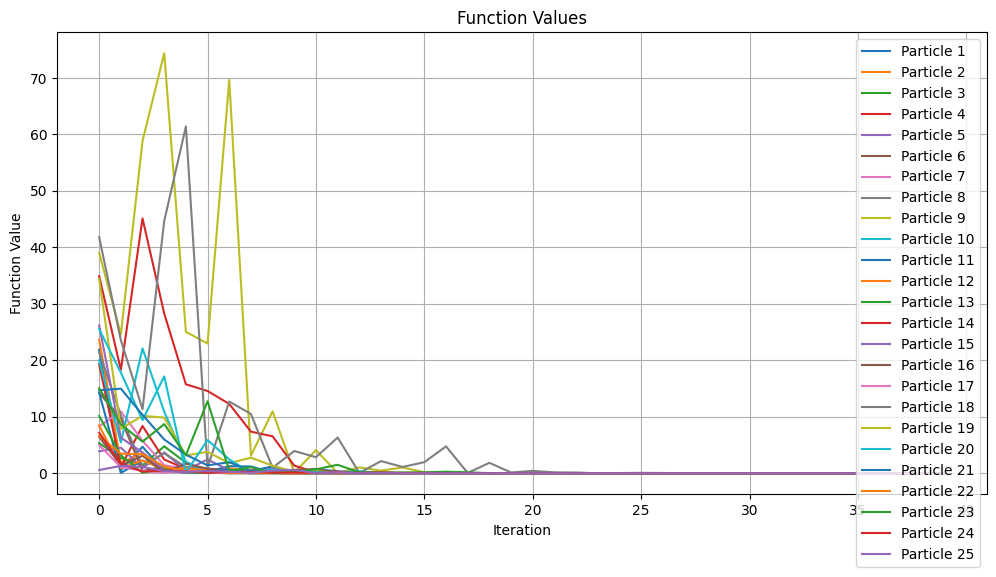

In [73]:

plot_pso(particle_positions, function_values)

Lien : https://www.youtube.com/watch?app=desktop&v=yVcqUqJG7Ic